# Prediction of package using CGPA (Linear Regression)

### Import necessary modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

### Import dataset using pandas module

In [3]:
df= pd.read_csv('placement-dataset.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


### Exploratory Data Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,200.0,6.99050,1.069409,4.26,6.1900,6.965,7.7375,9.58
package,200.0,2.99605,0.691644,1.37,2.4875,2.995,3.4925,4.62


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Now that we have a brief summary of our dataset, we will shortlist the features (X) and target (Y) for Linear Regression. To do this, we need to identify a value that is dependent on one or more other values. You can also plot visualizations to examine the correlations between the variables.

In [13]:
X= df[['cgpa']]
y=df['package']

To have an effective dataset, we need to consider every value within it. Therefore, we will plot all the correlations of the dataset together.

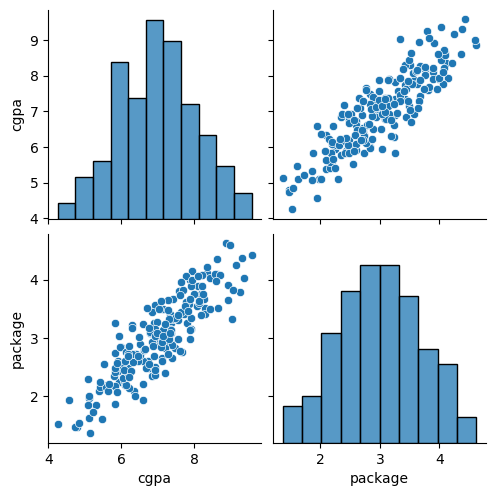

In [7]:
sns.pairplot(df, kind='scatter')

Now, we need to identify the correlations that resemble a straight line in linear regression.

### Train the Model

Now we have found our correlations ( in simpler words, column ) which we will use to train our model. 

To train the model we will split the data into a 70 percent to 30 percent ratio where we will test on the 30 percent and train on 70 percent.

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 42)

In [16]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we have trained our model, to generate test predictions we will use the testing data.

In [18]:
y_hat= model.predict(X_test)
y_hat

array([2.79941586, 3.15292804, 3.21564795, 2.41169282, 3.54065108,
       3.78012708, 3.18143709, 2.56564168, 3.19284071, 3.50644023,
       1.93274083, 2.37178016, 3.70030175, 2.77660862, 3.4893348 ,
       3.06169909, 2.34897292, 3.22134976, 2.20072587, 3.32968414,
       2.47441273, 2.91915386, 3.33538594, 2.89064481, 3.35249137,
       2.2178313 , 1.44808703, 2.73099415, 3.19854252, 2.34897292,
       3.75731984, 2.97617195, 3.69459994, 2.99327738, 2.61125615,
       3.36389499, 2.49721996, 3.09020814, 4.18495554, 2.97617195,
       3.11301538, 3.13012081, 3.93407593, 2.74239777, 1.93844264,
       2.97047014, 3.09590995, 3.28406966, 1.78449379, 3.35819318,
       2.34897292, 2.86783757, 3.51784385, 2.38888558, 3.07880452,
       3.83144336, 3.52924746, 3.40380766, 2.97047014, 3.07310271])

### Model Evaluation

Now we've successfully finished training and testing our model. It is now ready to provide predictions but we need to evaluate it first.

Evaluations for Linear Regression is conducted by three main parameters:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Measures the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.

Root Mean Squared Error (RMSE): The square root of MSE, bringing the error back to the original unit of the target variable. It's useful for understanding the magnitude of the error.


In [22]:
mae= mean_absolute_error(y_test, y_hat)
mae

0.2606898249919377

### Export the Model for Deployment

We have now finished building our model and are satisfied with its evaluation. Next, we will deploy the model and provide an interface so users can input their data and receive a predicted value.

The .pkl extension is used for saving models in Python because it stands for Pickle, which is a built-in module in Python for serializing and deserializing objects. Serialization (also known as "pickling") is the process of converting an object (like a trained machine learning model) into a byte stream, which can then be saved to a file. Deserialization (or "unpickling") is the reverse process, where the byte stream is loaded back into memory as the original object.
